# The Dow Jones Industrial Average and Its 30 Components

## Downloading Dow componentms datasets from Quandl - OK

In [2]:
!pip install quandl

In [3]:
import quandl

QUANDL_API_KEY = 'yz7qGzikAuQL9wn7rrX-'  # Your own Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

SYMBOLS = [
    'AAPL','MMM', 'AXP', 'BA', 'CAT',
    'CVX', 'CSCO', 'KO', 'DD', 'XOM',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ',
    'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'UNH', 'UTX', 'TRV', 
    'VZ', 'V', 'WMT', 'WBA', 'DIS',
]

wiki_symbols = ['WIKI/%s'%symbol for symbol in SYMBOLS]
df_components = quandl.get(
    wiki_symbols, 
    start_date='2017-01-01', 
    end_date='2017-12-31', 
    column_index=11)
df_components.columns = SYMBOLS  # Renaming the columns
df_components

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,114.715378,174.831943,74.162246,152.668443,91.258087,114.381567,29.484966,40.770394,72.575434,87.567241,239.298230,131.944957,160.939852,35.391923,112.925087,85.302395,117.321813,58.853859,61.219142,51.465478,31.756236,81.645971,159.581286,108.929230,NaN,53.359309,79.081715,67.291215,81.821163,105.285393
2017-01-04,114.586983,175.097063,75.372857,154.273227,90.850294,114.352450,29.311184,40.624089,73.127563,86.603799,240.843560,133.114002,162.932468,35.208194,112.739868,85.458859,117.184503,58.834290,60.945231,52.544689,32.035306,81.936871,160.035961,108.998029,NaN,53.300650,79.728295,67.683241,81.840888,106.635206
2017-01-05,115.169696,174.498088,74.443792,154.360760,90.296862,113.857459,29.379349,40.721626,72.772623,85.312787,239.050581,131.542176,162.393403,35.150174,113.919421,84.672217,117.400276,58.814721,60.945231,52.534788,32.343245,82.479884,160.302836,109.440312,NaN,53.417967,80.663349,67.830251,81.890202,106.575655
2017-01-06,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,242.596914,131.178692,163.192375,35.275883,113.373512,84.682050,118.439911,58.971273,61.473488,53.376374,32.218145,82.450794,160.530174,110.619731,NaN,52.632926,81.777456,66.899190,81.959241,108.163670
2017-01-09,117.520300,174.066041,74.977510,153.981448,89.685174,112.430723,29.389087,40.302218,72.683888,83.857990,240.605817,131.944957,161.382655,35.401592,113.354015,84.741048,118.116251,59.783388,61.277837,52.851620,32.208521,81.839904,160.075498,109.587739,NaN,52.059755,81.319877,67.340219,81.416791,107.548315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,175.010000,NaN,98.740000,295.100000,155.750000,124.980000,38.550000,45.590000,NaN,83.970000,258.970000,188.130000,152.500000,46.700000,140.120000,107.450000,171.420000,56.360000,85.510000,63.290000,36.140000,92.130000,220.000000,127.230000,134.39,53.190000,112.690000,98.210000,72.710000,108.670000
2017-12-26,170.570000,NaN,98.570000,295.360000,156.440000,125.980000,38.480000,45.810000,NaN,83.980000,257.720000,190.360000,152.830000,46.080000,140.090000,107.020000,171.290000,56.340000,85.400000,63.650000,36.210000,92.480000,219.600000,127.140000,134.78,53.220000,112.990000,99.160000,73.300000,108.120000
2017-12-27,170.600000,NaN,99.130000,295.620000,157.520000,125.550000,38.560000,45.930000,NaN,83.900000,255.950000,190.190000,153.130000,46.110000,140.570000,107.220000,172.670000,56.340000,85.710000,62.950000,36.330000,92.100000,220.420000,127.580000,134.77,53.280000,114.020000,99.260000,72.860000,107.640000


In [5]:
filled_df_components = df_components.fillna(method='ffill')
daily_df_components = filled_df_components.resample('24h').ffill()
daily_df_components = daily_df_components.fillna(method='bfill')
daily_df_components

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,114.715378,174.831943,74.162246,152.668443,91.258087,114.381567,29.484966,40.770394,72.575434,87.567241,239.298230,131.944957,160.939852,35.391923,112.925087,85.302395,117.321813,58.853859,61.219142,51.465478,31.756236,81.645971,159.581286,108.929230,120.549246,53.359309,79.081715,67.291215,81.821163,105.285393
2017-01-04,114.586983,175.097063,75.372857,154.273227,90.850294,114.352450,29.311184,40.624089,73.127563,86.603799,240.843560,133.114002,162.932468,35.208194,112.739868,85.458859,117.184503,58.834290,60.945231,52.544689,32.035306,81.936871,160.035961,108.998029,120.549246,53.300650,79.728295,67.683241,81.840888,106.635206
2017-01-05,115.169696,174.498088,74.443792,154.360760,90.296862,113.857459,29.379349,40.721626,72.772623,85.312787,239.050581,131.542176,162.393403,35.150174,113.919421,84.672217,117.400276,58.814721,60.945231,52.534788,32.343245,82.479884,160.302836,109.440312,120.549246,53.417967,80.663349,67.830251,81.890202,106.575655
2017-01-06,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,242.596914,131.178692,163.192375,35.275883,113.373512,84.682050,118.439911,58.971273,61.473488,53.376374,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670
2017-01-07,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,242.596914,131.178692,163.192375,35.275883,113.373512,84.682050,118.439911,58.971273,61.473488,53.376374,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,175.010000,238.260000,98.740000,295.100000,155.750000,124.980000,38.550000,45.590000,83.930000,83.970000,258.970000,188.130000,152.500000,46.700000,140.120000,107.450000,171.420000,56.360000,85.510000,63.290000,36.140000,92.130000,220.000000,127.230000,134.390000,53.190000,112.690000,98.210000,72.710000,108.670000
2017-12-26,170.570000,238.260000,98.570000,295.360000,156.440000,125.980000,38.480000,45.810000,83.930000,83.980000,257.720000,190.360000,152.830000,46.080000,140.090000,107.020000,171.290000,56.340000,85.400000,63.650000,36.210000,92.480000,219.600000,127.140000,134.780000,53.220000,112.990000,99.160000,73.300000,108.120000
2017-12-27,170.600000,238.260000,99.130000,295.620000,157.520000,125.550000,38.560000,45.930000,83.930000,83.900000,255.950000,190.190000,153.130000,46.110000,140.570000,107.220000,172.670000,56.340000,85.710000,62.950000,36.330000,92.100000,220.420000,127.580000,134.770000,53.280000,114.020000,99.260000,72.860000,107.640000


## Yahoo data (from DNN - OK)

In [41]:
!pip install yahooquery

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 5.8MB 7.3MB/s 
     |████████████████████████████████| 911kB 46.5MB/s 
  Created wheel for yahooquery: filename=yahooquery-2.2.5-cp36-none-any.whl size=49956 sha256=f90ffde5a3ca10dd0ff1bc5d8e37c998b78aed46be0766a137c7b07f6a47ed7b
  Stored in directory: /root/.cache/pip/wheels/dd/6f/e6/04b0c8874ca6f29e0effceb10ea260f181746c43905a436477
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7013 sha256=4c6e079ee93d98847123dadac405d78c81e16f82c341404baed435ee346bf6a3
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built yahooquery requests-futures
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [100]:
from yahooquery import Ticker

#symbols = ['^SPX', '^COMP', '^DJI', '^DJT' ,'^RUT', '^DJU']
symbols = ['^DJI']
# Period options = 1d, 5d, 7d, 60d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# Interval options = 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
t = Ticker(symbols, asynchronous=True)
df = t.history(interval='1d', period='5y')  # 2 years is the most you can get for 60m interval data
df

volume         close  ...          open      adjclose
symbol date                                 ...                            
^DJI   2015-07-21  100170000  17919.289062  ...  18096.669922  17919.289062
       2015-07-22  112370000  17851.039062  ...  17918.349609  17851.039062
       2015-07-23   88600000  17731.919922  ...  17853.779297  17731.919922
       2015-07-24  103470000  17568.529297  ...  17731.050781  17568.529297
       2015-07-27  117860000  17440.589844  ...  17561.779297  17440.589844
...                      ...           ...  ...           ...           ...
       2020-07-14  401640000  26642.589844  ...  26044.169922  26642.589844
       2020-07-15  384900000  26870.099609  ...  27009.810547  26870.099609
       2020-07-16  287330000  26734.710938  ...  26746.570312  26734.710938
       2020-07-17  296460000  26671.949219  ...  26774.619141  26671.949219
       2020-07-20  309390000  26680.869141  ...  26660.289062  26680.869141

[1259 rows x 6 columns]

In [106]:
df_dji = pd.DataFrame(df['adjclose']).reset_index()[['date','adjclose']]
df_dji.set_index('date',inplace=True)
df_dji

,adjclose
date,
2015-07-21,17919.289062
2015-07-22,17851.039062
2015-07-23,17731.919922
2015-07-24,17568.529297
2015-07-27,17440.589844
...,...
2020-07-14,26642.589844
2020-07-15,26870.099609
2020-07-16,26734.710938


In [108]:
df_dji.columns = ['DJIA']
df_dji.index = pd.to_datetime(df_dji.index)

In [109]:
# Trim the new dataframe and resample
djia_2017 = pd.DataFrame(df_dji.loc['2017-01-01':'2017-12-31'])
djia_2017 = djia_2017.resample('24h').ffill()

In [110]:
djia_2017

,DJIA
date,
2017-01-03,19881.759766
2017-01-04,19942.160156
2017-01-05,19899.289062
2017-01-06,19963.800781
2017-01-07,19963.800781
...,...
2017-12-25,24754.060547
2017-12-26,24746.210938
2017-12-27,24774.300781


## Downloading DJIA Dataset from Alpha Vantage (can't use)

In [7]:
!pip install alpha_vantage

     |████████████████████████████████| 1.2MB 4.4MB/s 
     |████████████████████████████████| 256kB 17.2MB/s 
     |████████████████████████████████| 153kB 16.9MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=a2974db2d7c45a8d23986fc60acf8ddef0409ab11b2cf50e73dd2c098e101bd8
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=5598ef013aebf8e44582da0f4cb84b8462ed4a1a7a6c70aecb1a27901f89fd05
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [53]:
"""
Download the all-time DJIA dataset
"""
from alpha_vantage.timeseries import TimeSeries

# Update your Alpha Vantage API key here...
ALPHA_VANTAGE_API_KEY = 'VHR4VD5LDC1NL12S'

ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
#df, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full') # work normal
df, meta_data = ts.get_daily_adjusted(symbol='MSFT', outputsize='full') # work normal
#df, meta_data = ts.get_daily_adjusted(symbol='^DJI', outputsize='full') #DJIA
#df, meta_data = ts.get_intraday(symbol='^DJI',interval='1min', outputsize='full')
df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-07-20,205.00,212.30,203.01,211.60,211.6000,36386100.0,0.0,1.0
2020-07-17,204.47,205.04,201.39,202.88,202.8800,31636100.0,0.0,1.0
2020-07-16,205.40,205.70,202.31,203.92,203.9200,29940700.0,0.0,1.0
2020-07-15,209.56,211.33,205.03,208.04,208.0400,32248900.0,0.0,1.0
2020-07-14,206.13,208.85,202.03,208.35,208.3500,37598100.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,91.81,92.87,90.50,91.56,29.3562,35083700.0,0.0,1.0
1999-11-04,92.31,92.75,90.31,91.75,29.4171,27119700.0,0.0,1.0
1999-11-03,92.94,93.50,91.50,92.00,29.4973,22258500.0,0.0,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5212 entries, 2020-07-20 to 1999-11-01
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               5212 non-null   float64
 1   2. high               5212 non-null   float64
 2   3. low                5212 non-null   float64
 3   4. close              5212 non-null   float64
 4   5. adjusted close     5212 non-null   float64
 5   6. volume             5212 non-null   float64
 6   7. dividend amount    5212 non-null   float64
 7   8. split coefficient  5212 non-null   float64
dtypes: float64(8)
memory usage: 366.5 KB


In [55]:
df.index

DatetimeIndex(['2020-07-20', '2020-07-17', '2020-07-16', '2020-07-15',
               '2020-07-14', '2020-07-13', '2020-07-10', '2020-07-09',
               '2020-07-08', '2020-07-07',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', name='date', length=5212, freq=None)

In [56]:
import pandas as pd

# Prepare the dataframe
df_dji = pd.DataFrame(df['5. adjusted close'])
df_dji

,5. adjusted close
date,
2020-07-20,211.6000
2020-07-17,202.8800
2020-07-16,203.9200
2020-07-15,208.0400
2020-07-14,208.3500
...,...
1999-11-05,29.3562
1999-11-04,29.4171
1999-11-03,29.4973


In [59]:
df_dji.columns = ['DJIA']
df_dji.index = pd.to_datetime(df_dji.index)
df_dji.head()

,DJIA
date,
2020-07-20,211.60
2020-07-17,202.88
2020-07-16,203.92
2020-07-15,208.04
2020-07-14,208.35


In [76]:
df_dji['2017'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-12-29 to 2017-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJIA    251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [83]:
df_dji['2017-07-17']

,DJIA
date,
2017-07-17,69.928


In [75]:
df_dji.index

DatetimeIndex(['2020-07-20', '2020-07-17', '2020-07-16', '2020-07-15',
               '2020-07-14', '2020-07-13', '2020-07-10', '2020-07-09',
               '2020-07-08', '2020-07-07',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', name='date', length=5212, freq=None)

In [93]:
# Trim the new dataframe and resample
djia_2017 = pd.DataFrame(df_dji['2017'])
djia_2017

,DJIA
date,
2017-12-29,82.3987
2017-12-28,82.5721
2017-12-27,82.5624
2017-12-26,82.2638
2017-12-22,82.3698
...,...
2017-01-09,59.0275
2017-01-06,59.2160
2017-01-05,58.7071


In [60]:
# Trim the new dataframe and resample
djia_2017 = pd.DataFrame(df_dji.loc['2017-01-01':'2017-12-31'])
djia_2017

,DJIA
date,


In [ ]:
djia_2017 = djia_2017.resample('24h').ffill()

# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [112]:
from sklearn.decomposition import KernelPCA

fn_z_score = lambda x: (x - x.mean()) / x.std()

df_z_components = daily_df_components.apply(fn_z_score) # Standard scaler value
fitted_pca = KernelPCA().fit(df_z_components)

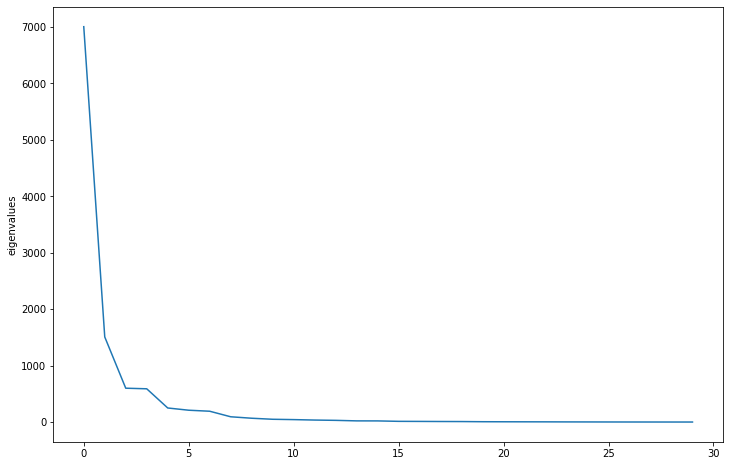

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fitted_pca.lambdas_)
plt.ylabel('eigenvalues')
plt.show();

We can see that the first few eigenvalues explain much of the
variances in the data, and become more negligent further
down the components. Taking the first five eigenvalues, let's
see how much explanation each of these eigenvalues gives us
by obtaining their weighted average values:

In [114]:
fitted_pca.lambdas_

array([7.00520421e+03, 1.50840555e+03, 6.00290603e+02, 5.89881002e+02,
       2.49899362e+02, 2.10206797e+02, 1.92311419e+02, 9.40918089e+01,
       6.82352834e+01, 4.98825559e+01, 4.39918873e+01, 3.59718863e+01,
       3.07638426e+01, 2.14611798e+01, 2.08555531e+01, 1.32314004e+01,
       1.19000130e+01, 1.03210797e+01, 9.38084697e+00, 6.55922694e+00,
       5.45953594e+00, 4.80259160e+00, 4.17366677e+00, 3.15076137e+00,
       2.60325990e+00, 1.98857184e+00, 1.58749237e+00, 1.31582962e+00,
       1.10922910e+00, 9.63555987e-01])

In [115]:
fn_weighted_avg = lambda x: x / x.sum()
weighted_values = fn_weighted_avg(fitted_pca.lambdas_)[:5]

In [116]:
print(weighted_values)

[0.64863002 0.13966718 0.05558246 0.05461861 0.02313883]


We can see that the first component explains 65% of the
variance of the data, the second component explains 14%, and
so on. Taking the sum of these values, we get the following:

In [117]:
weighted_values.sum()

0.9216371041932273

## Reconstructing the Dow Index with PCA

In [144]:
df_z_components.head() # standard scaler

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-2.315397,-1.525538,-1.339317,-1.412133,-1.089782,0.694084,-1.419152,-1.447090,-2.402481,3.546897,0.563686,-1.671666,0.595602,-0.441790,-1.694550,-0.871499,-1.753965,-0.904704,-1.358646,-1.254793,-1.049687,-2.447180,-1.277403,-1.473571,-0.805324,2.219517,-1.888756,-1.176378,0.570068,-0.145681
2017-01-04,-2.323857,-1.511643,-1.176359,-1.374396,-1.111909,0.689275,-1.495961,-1.515627,-2.240680,3.032151,0.694169,-1.583726,0.783705,-0.488036,-1.715294,-0.848372,-1.761891,-0.911023,-1.395684,-0.918835,-0.880851,-2.340027,-1.254702,-1.460138,-0.805324,2.194841,-1.822436,-1.134748,0.573704,0.147942
2017-01-05,-2.285461,-1.543036,-1.301419,-1.372338,-1.141938,0.607508,-1.465832,-1.469935,-2.344695,2.342390,0.542776,-1.701965,0.732817,-0.502640,-1.583187,-0.964644,-1.749437,-0.917341,-1.395684,-0.921918,-0.694548,-2.140006,-1.241377,-1.373787,-0.805324,2.244192,-1.726526,-1.119137,0.582792,0.134988
2017-01-06,-2.200859,-1.516274,-1.281462,-1.363418,-1.139831,0.532155,-1.440008,-1.474504,-2.468935,2.316653,0.842217,-1.729307,0.808241,-0.470998,-1.644328,-0.963191,-1.689429,-0.866793,-1.324254,-0.659932,-0.770234,-2.150721,-1.230027,-1.143516,-0.805324,1.913953,-1.612252,-1.218008,0.595516,0.480427
2017-01-07,-2.200859,-1.516274,-1.281462,-1.363418,-1.139831,0.532155,-1.440008,-1.474504,-2.468935,2.316653,0.842217,-1.729307,0.808241,-0.470998,-1.644328,-0.963191,-1.689429,-0.866793,-1.324254,-0.659932,-0.770234,-2.150721,-1.230027,-1.143516,-0.805324,1.913953,-1.612252,-1.218008,0.595516,0.480427


In [145]:
daily_df_components.head()

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,114.715378,174.831943,74.162246,152.668443,91.258087,114.381567,29.484966,40.770394,72.575434,87.567241,239.298230,131.944957,160.939852,35.391923,112.925087,85.302395,117.321813,58.853859,61.219142,51.465478,31.756236,81.645971,159.581286,108.929230,120.549246,53.359309,79.081715,67.291215,81.821163,105.285393
2017-01-04,114.586983,175.097063,75.372857,154.273227,90.850294,114.352450,29.311184,40.624089,73.127563,86.603799,240.843560,133.114002,162.932468,35.208194,112.739868,85.458859,117.184503,58.834290,60.945231,52.544689,32.035306,81.936871,160.035961,108.998029,120.549246,53.300650,79.728295,67.683241,81.840888,106.635206
2017-01-05,115.169696,174.498088,74.443792,154.360760,90.296862,113.857459,29.379349,40.721626,72.772623,85.312787,239.050581,131.542176,162.393403,35.150174,113.919421,84.672217,117.400276,58.814721,60.945231,52.534788,32.343245,82.479884,160.302836,109.440312,120.549246,53.417967,80.663349,67.830251,81.890202,106.575655
2017-01-06,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,242.596914,131.178692,163.192375,35.275883,113.373512,84.682050,118.439911,58.971273,61.473488,53.376374,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670
2017-01-07,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,242.596914,131.178692,163.192375,35.275883,113.373512,84.682050,118.439911,58.971273,61.473488,53.376374,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670


In [120]:
import numpy as np

kernel_pca = KernelPCA(n_components=5).fit(df_z_components) # 30 columns to 5 columns
kernel_pca

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='linear',
          kernel_params=None, max_iter=None, n_components=5, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

With the fit() method, we fitted the normalized dataset using
the linear kernel PCA function with five components. The
transform() method transforms the original dataset with the
kernel PCA. These values are normalized using the weights
indicated by the eigenvectors, computed with dot matrix
multiplication. We then create a copy of the Dow time series

In [137]:
pca_5 = kernel_pca.transform(daily_df_components) #why fit and transform is different ?
print(pca_5.shape)
pca_5

(361, 5)


array([[ 397.77274642,  156.46022995,   15.52282746, -142.67941247,
        -164.83969907],
       [ 398.74174256,  157.6802578 ,   15.36433081, -144.81318203,
        -165.40620938],
       [ 398.41618505,  155.69588779,   15.19315159, -145.42651126,
        -164.34608323],
       ...,
       [ 564.94885624,  137.08450387,   17.04600481, -159.62460728,
        -152.71234266],
       [ 566.42748146,  137.5664028 ,   17.02240662, -159.77713834,
        -152.83790107],
       [ 563.79996711,  136.7588023 ,   16.70291715, -158.90475855,
        -152.47865341]])

In [138]:
weights = fn_weighted_avg(kernel_pca.lambdas_)
print(weights)

[0.70378028 0.15154249 0.0603084  0.0592626  0.02510623]


In [139]:
reconstructed_values = np.dot(pca_5, weights)
print(reconstructed_values.shape)
reconstructed_values

(361,)


array([291.99708871, 292.7137008 , 292.16380821, 292.78370954,
       292.78370954, 292.78370954, 291.95163099, 292.20629119,
       292.80423715, 291.99888411, 291.87908174, 291.87908174,
       291.87908174, 291.87908174, 290.54114039, 290.44560663,
       289.71288793, 290.39793663, 290.39793663, 290.39793663,
       290.29126384, 291.87580046, 294.41867994, 295.08870732,
       294.80281037, 294.80281037, 294.80281037, 292.41203326,
       290.24698306, 290.95864833, 290.21049197, 293.74987021,
       293.74987021, 293.74987021, 293.19789589, 293.69051012,
       293.54007222, 295.27174518, 296.69848199, 296.69848199,
       296.69848199, 299.11086824, 300.49053088, 302.37938377,
       302.04459172, 302.19841248, 302.19841248, 302.19841248,
       302.19841248, 304.5913931 , 304.87718254, 305.36321418,
       305.35663314, 305.35663314, 305.35663314, 306.58566695,
       306.33211653, 311.08584665, 309.20770999, 309.41864531,
       309.41864531, 309.41864531, 308.74852055, 308.42

In [140]:
djia_2017

,DJIA
date,
2017-01-03,19881.759766
2017-01-04,19942.160156
2017-01-05,19899.289062
2017-01-06,19963.800781
2017-01-07,19963.800781
...,...
2017-12-25,24754.060547
2017-12-26,24746.210938
2017-12-27,24774.300781


In [141]:
# Combine DJIA and PCA index for comparison
df_combined = djia_2017.copy()
df_combined['pca_5'] = reconstructed_values
df_combined

,DJIA,pca_5
date,,
2017-01-03,19881.759766,291.997089
2017-01-04,19942.160156,292.713701
2017-01-05,19899.289062,292.163808
2017-01-06,19963.800781,292.783710
2017-01-07,19963.800781,292.783710
...,...,...
2017-12-25,24754.060547,405.467366
2017-12-26,24746.210938,405.410412
2017-12-27,24774.300781,406.108209


In [142]:
df_combined = df_combined.apply(fn_z_score) # standard value
df_combined

,DJIA,pca_5
date,,
2017-01-03,-1.410683,-1.322175
2017-01-04,-1.364840,-1.300559
2017-01-05,-1.397379,-1.317146
2017-01-06,-1.348415,-1.298447
2017-01-07,-1.348415,-1.298447
...,...,...
2017-12-25,2.287331,2.100552
2017-12-26,2.281373,2.098834
2017-12-27,2.302693,2.119882


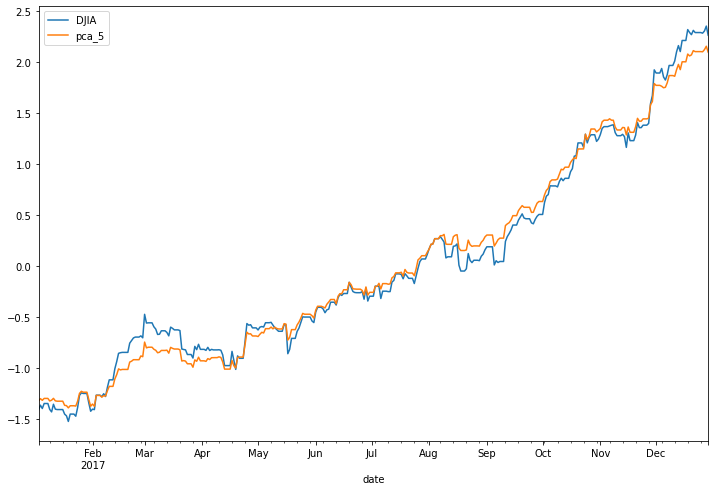

In [143]:
df_combined.plot(figsize=(12, 8));

# Analyzing a time series with trend

Let's examine a time series dataset. Take, for example, the
prices of gold futures traded on the CME. On Quandl, the gold
futures continuous contract is available for download with the
following code: CHRIS/CME_GC1. This data is curated by the Wiki
Continuous Futures community group, taking into account
the front month contracts only. The sixth column of the
dataset contains the settlement prices.

In [146]:
import quandl

QUANDL_API_KEY = 'yz7qGzikAuQL9wn7rrX-'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

df = quandl.get(
    'CHRIS/CME_GC1', 
    column_index=6,
    collapse='monthly',
    start_date='2000-01-01')

In [149]:
df

,Settle
Date,
2000-01-31,283.2
2000-02-29,294.2
2000-03-31,278.4
2000-04-30,274.7
2000-05-31,271.7
...,...
2020-03-31,1583.4
2020-04-30,1684.2
2020-05-31,1736.9


In [148]:
df_settle = df['Settle'].resample('MS').ffill().dropna()
#The resample() method helps to ensure that the data is smoothed out on a monthly basis, 
#and the ffill() method forward fills any missing values
df_settle

Date
2000-02-01     283.2
2000-03-01     294.2
2000-04-01     278.4
2000-05-01     274.7
2000-06-01     271.7
               ...  
2020-03-01    1564.1
2020-04-01    1583.4
2020-05-01    1684.2
2020-06-01    1736.9
2020-07-01    1800.5
Freq: MS, Name: Settle, Length: 246, dtype: float64

In [150]:
df_rolling = df_settle.rolling(12)
df_rolling

Rolling [window=12,center=False,axis=0]

In [151]:
df_mean = df_rolling.mean()
df_std = df_rolling.std()

In [153]:
df_mean[:15]

Date
2000-02-01           NaN
2000-03-01           NaN
2000-04-01           NaN
2000-05-01           NaN
2000-06-01           NaN
2000-07-01           NaN
2000-08-01           NaN
2000-09-01           NaN
2000-10-01           NaN
2000-11-01           NaN
2000-12-01           NaN
2001-01-01    277.816667
2001-02-01    276.350000
2001-03-01    274.150000
2001-04-01    272.441667
Freq: MS, Name: Settle, dtype: float64

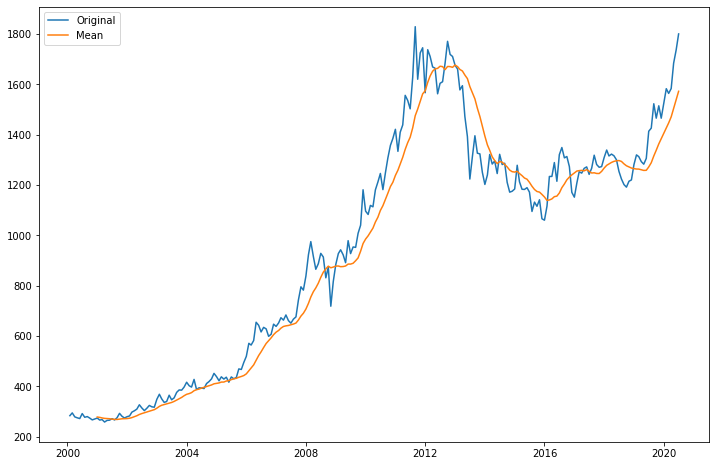

In [154]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();
# Mean: 12 value average continue

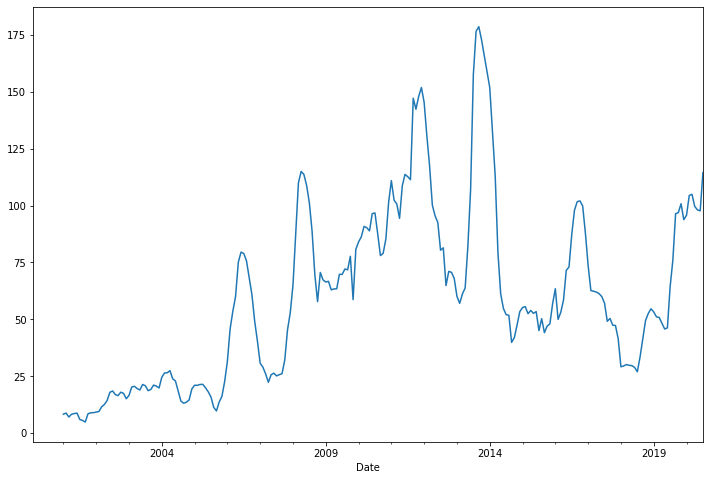

In [155]:
df_std.plot(figsize=(12, 8));

In [156]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF statistic:  -0.6911721218113474
p-value: 0.8490229252489614
Critical value (1%): -3.459
Critical value (5%): -2.874
Critical value (10%): -2.573


Observe from the plots that the mean and standard deviations
swing over time, with the mean exhibiting an overall upward
trend. The ADF test statistic value is more than the critical
values (especially at 5%), and the p-value is more than 0.05.
With these, we cannot reject the null hypothesis that there is a
unit root and consider that our data is non-stationary

# Making a time series stationary

## Detrending

In [159]:
df_settle

Date
2000-02-01     283.2
2000-03-01     294.2
2000-04-01     278.4
2000-05-01     274.7
2000-06-01     271.7
               ...  
2020-03-01    1564.1
2020-04-01    1583.4
2020-05-01    1684.2
2020-06-01    1736.9
2020-07-01    1800.5
Freq: MS, Name: Settle, Length: 246, dtype: float64

In [158]:
import numpy as np

df_log = np.log(df_settle)
df_log

Date
2000-02-01    5.646153
2000-03-01    5.684260
2000-04-01    5.629059
2000-05-01    5.615680
2000-06-01    5.604699
                ...   
2020-03-01    7.355066
2020-04-01    7.367330
2020-05-01    7.429046
2020-06-01    7.459857
2020-07-01    7.495820
Freq: MS, Name: Settle, Length: 246, dtype: float64

In [163]:
df_log_ma= df_log.rolling(2).mean()
df_log_ma

Date
2000-02-01         NaN
2000-03-01    5.665207
2000-04-01    5.656659
2000-05-01    5.622369
2000-06-01    5.610189
                ...   
2020-03-01    7.361040
2020-04-01    7.361198
2020-05-01    7.398188
2020-06-01    7.444452
2020-07-01    7.477838
Freq: MS, Name: Settle, Length: 246, dtype: float64

In [160]:
df_detrend = df_log - df_log_ma
df_detrend.dropna(inplace=True)
df_detrend

Date
2000-03-01    0.019053
2000-04-01   -0.027600
2000-05-01   -0.006690
2000-06-01   -0.005491
2000-07-01    0.035171
                ...   
2020-03-01   -0.005974
2020-04-01    0.006132
2020-05-01    0.030858
2020-06-01    0.015406
2020-07-01    0.017981
Freq: MS, Name: Settle, Length: 245, dtype: float64

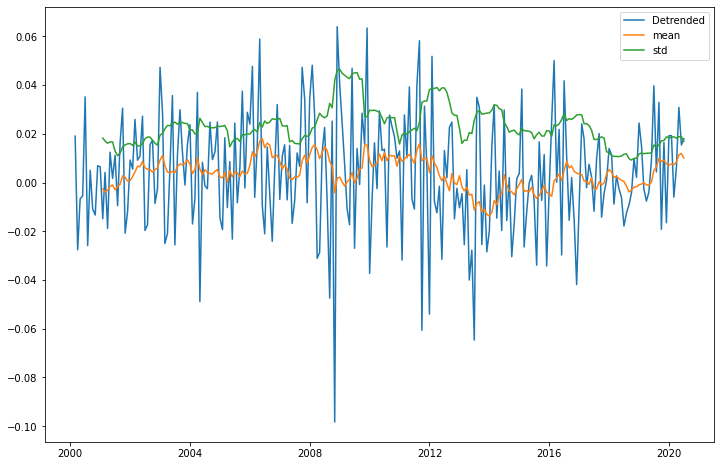

In [161]:
# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [162]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -17.693906117676107
p-value: 0.00000
Critical value (1%): -3.457
Critical value (5%): -2.873
Critical value (10%): -2.573


The p-value for this detrended data is less than 0.05. Our ADF
test statistic is lower than all the critical values. We can reject
the null hypothesis and say that this data is stationary.

## Removing trend by differencing

In [166]:
df_log[:7]

Date
2000-02-01    5.646153
2000-03-01    5.684260
2000-04-01    5.629059
2000-05-01    5.615680
2000-06-01    5.604699
2000-07-01    5.675040
2000-08-01    5.623295
Freq: MS, Name: Settle, dtype: float64

In [164]:
df_log_diff = df_log.diff(periods=3).dropna()
df_log_diff

Date
2000-05-01   -0.030474
2000-06-01   -0.079561
2000-07-01    0.045981
2000-08-01    0.007616
2000-09-01    0.028661
                ...   
2020-03-01    0.065046
2020-04-01    0.038827
2020-05-01    0.062032
2020-06-01    0.104791
2020-07-01    0.128490
Freq: MS, Name: Settle, Length: 243, dtype: float64

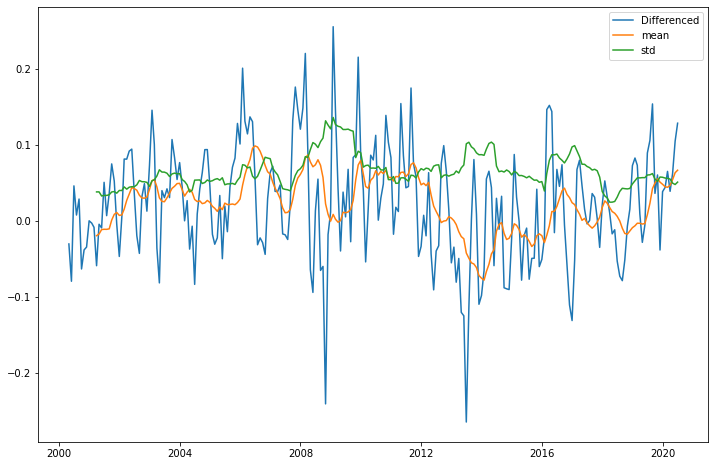

In [167]:
# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [168]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log_diff)

print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -3.1184959270888446
p-value: 0.02521
Critical value (1%): -3.459
Critical value (5%): -2.874
Critical value (10%): -2.574


From the ADF test, the p-value for this data is less than 0.05.
Our ADF test statistic is lower than the 5% critical value,
indicating a 95% confidence level that this data is stationary.
We can reject the null hypothesis and say that this data is
stationary.

## Seasonal Decomposing

In [169]:
df_log

Date
2000-02-01    5.646153
2000-03-01    5.684260
2000-04-01    5.629059
2000-05-01    5.615680
2000-06-01    5.604699
                ...   
2020-03-01    7.355066
2020-04-01    7.367330
2020-05-01    7.429046
2020-06-01    7.459857
2020-07-01    7.495820
Freq: MS, Name: Settle, Length: 246, dtype: float64

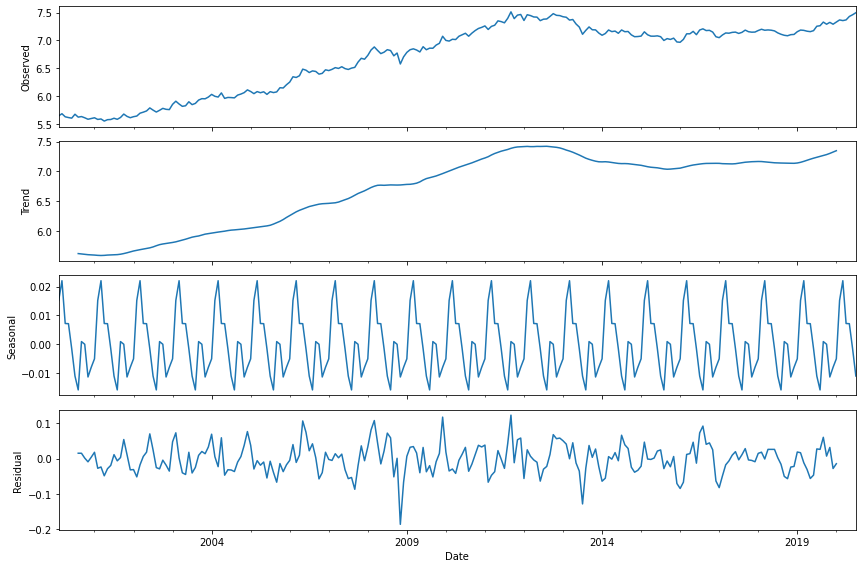

In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(df_log.dropna(), freq=12)

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

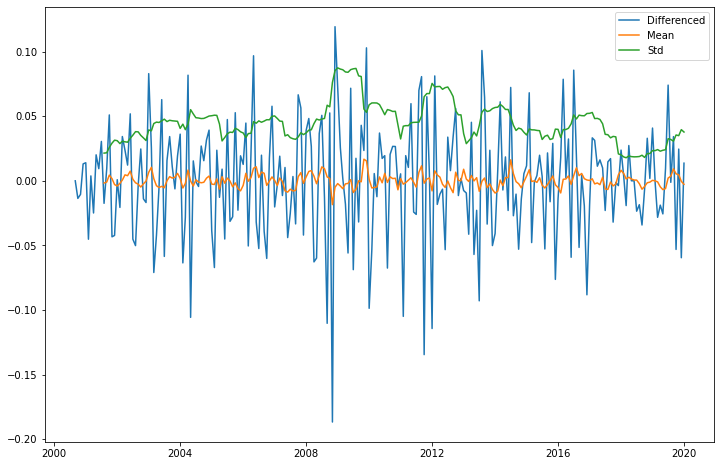

In [172]:
df_log_diff = df_residual.diff().dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [173]:
result = adfuller(df_residual.dropna()) # residual: remove trend, seasonal so ADF reject
print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -6.871133686268788
p-value: 0.00000
Critical value (1%): -3.460
Critical value (5%): -2.875
Critical value (10%): -2.574


# Forecasting and Predicting a Time Series

## Finding model parameters by grid search

In [196]:
import itertools    
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    df=dataframe
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    for order in param_combinations:    
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df, order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs 

Let's examine a time series dataset. Take, for example, the prices of gold futures traded on the CME. On Quandl, the gold futures continuous contract is available for download with the following code: CHRIS/CME_GC1. This data is curated by the Wiki Continuous Futures community group, taking into account the front month contracts only. The sixth column of the dataset contains the settlement prices.

In [178]:
df_settle

Date
2000-02-01     283.2
2000-03-01     294.2
2000-04-01     278.4
2000-05-01     274.7
2000-06-01     271.7
               ...  
2020-03-01    1564.1
2020-04-01    1583.4
2020-05-01    1684.2
2020-06-01    1736.9
2020-07-01    1800.5
Freq: MS, Name: Settle, Length: 246, dtype: float64

In [197]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12)

In [198]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA(0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 2397.270


ARIMA(0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 2397.270

## Fitting the SARIMAX model

In [181]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)

In [182]:
print(model_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             Settle   No. Observations:                  246
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1195.635
Date:                            Tue, 21 Jul 2020   AIC                           2397.270
Time:                                    08:40:59   BIC                           2407.437
Sample:                                02-01-2000   HQIC                          2401.376
                                     - 07-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1424      0.041     -3.451      0.001      -0.223      -0.062
ma.S.L12      -1.0000      0.066   

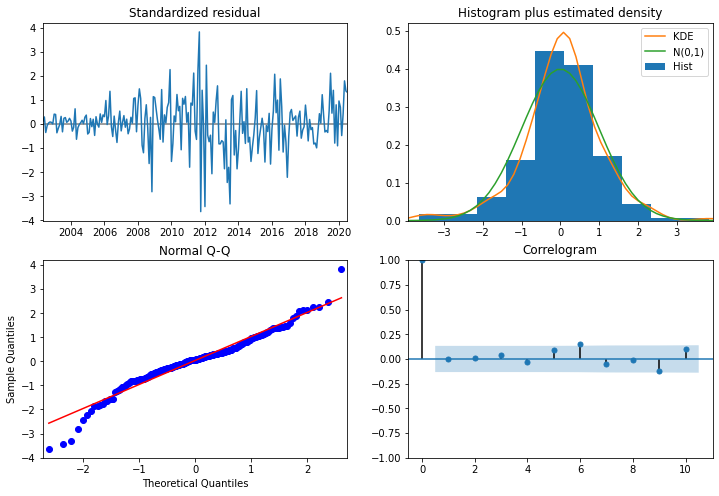

In [183]:
model_results.plot_diagnostics(figsize=(12, 8));

In [184]:
model_results.resid.describe()

count    246.000000
mean       2.460971
std       57.218432
min     -202.864691
25%      -21.021209
50%        4.328127
75%       25.806667
max      283.200000
dtype: float64

## Predicting the model

In [190]:
n = len(df_settle.index)
n

246

In [185]:

prediction = model_results.get_prediction(
    start=n-12*5, 
    end=n+5
)
prediction_ci = prediction.conf_int()

In [191]:
dir(prediction)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conf_int',
 'df',
 'dist',
 'dist_args',
 'link',
 'linpred',
 'model',
 'predicted_mean',
 'prediction_results',
 'row_labels',
 'se_mean',
 'se_obs',
 'summary_frame',
 't_test',
 'tvalues',
 'var_pred_mean',
 'var_resid']

In [194]:
df_settle.tail()

Date
2020-03-01    1564.1
2020-04-01    1583.4
2020-05-01    1684.2
2020-06-01    1736.9
2020-07-01    1800.5
Freq: MS, Name: Settle, dtype: float64

In [192]:
prediction.predicted_mean

2015-08-01    1181.894572
2015-09-01    1135.193610
2015-10-01    1132.475195
2015-11-01    1116.664615
2015-12-01    1157.408572
                 ...     
2020-09-01    1821.604972
2020-10-01    1815.845681
2020-11-01    1817.270556
2020-12-01    1820.960309
2021-01-01    1821.658364
Freq: MS, Length: 66, dtype: float64

In [186]:
print(prediction_ci.head(3))
# sealter từ 2000 đến 2020, đang dự đoán từ 2015

            lower Settle  upper Settle
2015-08-01   1073.775865   1290.013279
2015-09-01   1027.074903   1243.312317
2015-10-01   1024.356488   1240.593902


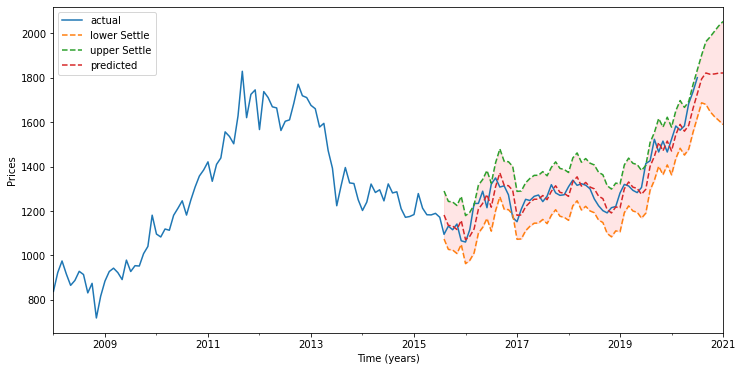

In [195]:
plt.figure(figsize=(12, 6))

ax = df_settle['2008':].plot(label='actual')

prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

prediction.predicted_mean.plot(
    ax=ax, style=['--'],
    label='predicted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend()
plt.show()